https://www.youtube.com/watch?v=4yOcsWg-7g8

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2 
from PIL import Image

In [3]:
if(torch.cuda.is_available()) :
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print(device) #cuda GeForce RTX 3090

cuda GeForce RTX 3090


Read a batch of training images along with their bounding boxes and lables.

in this examole, i use read only 1 image i.e batch_size = 1

(3034, 2146, 3)


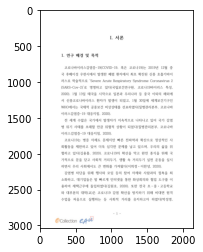

In [9]:
# input image could be any size
img0 = cv2.imread('0010.jpg')
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
print(img0.shape)
plt.imshow(img0)
plt.show()

In [12]:
#Object information: a set of bounfing boxes [ymin, xmin, ymax, xmax] and their labels
bbox0 = np.array([[160, 147, 260, 234], [139, 312, 200, 348]])
labels = np.array([1, 1]) #0: backgraund, 1:hangul

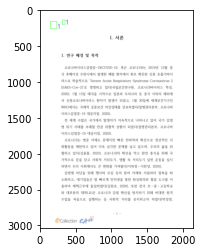

In [13]:
#display bounding box and labels
#cv2.putText
img0_clone = np.copy(img0)
for i in range(len(bbox0)) :
    cv2.rectangle(img0_clone, (bbox0[i][1],bbox0[i][0]), (bbox0[i][3],bbox0[i][2]), color = (0, 255, 0), thickness = 3)
    cv2.putText(img0_clone, str(int(labels[i])), (bbox0[i][3], bbox0[i][2]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), thickness = 3)
plt.imshow(img0_clone)
plt.show()

Resize the input images to (h = 800, w = 800)

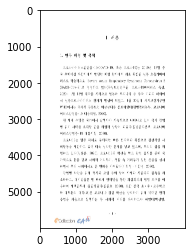

In [16]:
img = cv2.resize(img0, dsize = (4000, 6000), interpolation = cv2.INTER_CUBIC)
plt.imshow(img)
plt.show()

In [ ]:
#change the bounding box coordinates
Wratio = 800/img0.shape[1]
Hratio = 800/img0.shape[0]
ratioLst = [Hratio, Wratio, Hratio, Wratio]
bbox = []
for box in bbox():
    box = [i nt(a*b) for a, b in zip(box, ratioLst)]
    bbox.append(box)
bbox = np.array(bbox)
print(bbox)

In [ ]:
 #display bounding box and labels
img_clone = np.copy(img)
bbox_clone = bbox.astype(int)
for i in range(len(bbox)) :
    cv2.rectangle(img_clone,(bbox0[i][1],bbox0[i][0]), (bbox0[i][3],bbox0[i][2]), color = (0, 255, 0), thickness = 3) #Draw Rectamgle
    cv2.putText(img_clone, str(int(labels[i])), (bbox0[i][3], bbox0[i][2]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), thickness = 3) #Write the predict
plt.imshow(img_clone)    
plt.show()
